[[ 1.          0.          0.        ]
 [ 1.          1.41421356  1.        ]
 [ 1.         -1.41421356  1.        ]]
[[ 9.54199124e-06  0.00000000e+00 -5.79017154e-01]]
[-0.31875839]
Accuracy: 0.6666666666666666


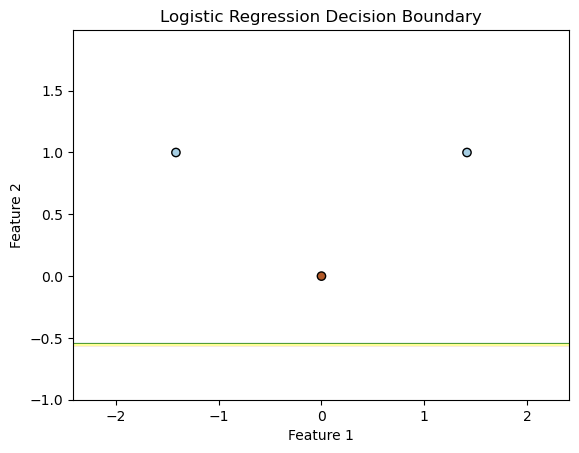

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Original data
X = np.array([0, 1, -1]).reshape(-1, 1)
y = np.array([1, -1, -1])

# Transformed data
X_transformed = np.column_stack((np.ones_like(X), np.sqrt(2) * X, X**2))
print(X_transformed)



# Training a logistic regression model
model = LogisticRegression()
model.fit(X_transformed, y)

# Predictions on the test set
y_pred = model.predict(X_transformed)


w = model.coef_
b = model.intercept_
print(w)
print(b)

# Accuracy on the test set
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")



[-1 -1 -1]
[-3.33066907e-16]
[[ 0.00000000e+00 -1.11022302e-16 -1.00000000e+00]]


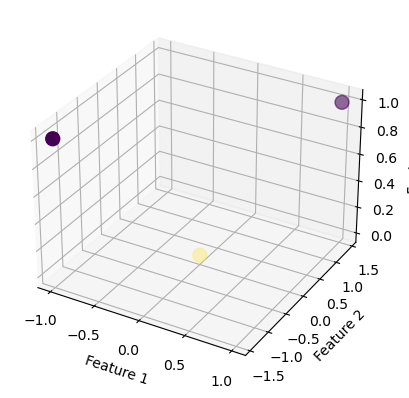

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

# Original data
X = np.array([0, 1, -1]).reshape(-1, 1)
y = np.array([1, -1, -1])

# Feature mapping
X_transformed = np.hstack([np.ones_like(X), np.sqrt(2) * X, X ** 2])

# Create SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_transformed, y)
print(clf.predict(X_transformed))
print(clf.intercept_)
print( clf.coef_)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter original points
ax.scatter(X, X_transformed[:, 1], X_transformed[:, 2], c=y, marker='o', s=100, label='Original Points')



ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')


plt.show()


In [39]:
import numpy as np
from scipy.optimize import minimize



# Define the objective function for optimization
def objective(alpha):
    w = np.sum(alpha[i] * y[i] * X[i] for i in range(len(X)))
    return 0.5 * np.dot(w, w)

# Define the equality constraint
def constraint(alpha):
    return np.dot(alpha, y)

# Set the bounds for alpha
bounds = [(0, None) for _ in range(len(X))]

# Initial guess for alpha
initial_alpha = np.zeros(len(X))

# Create a constraint dictionary for scipy.optimize.minimize
constraint_dict = {'type': 'eq', 'fun': constraint}

# Optimize the objective function subject to the constraint
result = minimize(objective, initial_alpha, method='SLSQP', bounds=bounds, constraints=constraint_dict)

# Extract the optimal alpha values
optimal_alpha = result.x

# Calculate the optimal w
optimal_w = np.sum(optimal_alpha[i] * y[i] * X[i] for i in range(len(X)))

# Calculate the margin
margin = 1 / np.linalg.norm(optimal_w)

print("Optimal alpha:", optimal_alpha)
print("Optimal w:", optimal_w)
print("Margin:", margin)


Optimal alpha: [0. 0. 0.]
Optimal w: [0.]
Margin: inf


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29536\424698759.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  w = np.sum(alpha[i] * y[i] * X[i] for i in range(len(X)))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29536\424698759.py:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  optimal_w = np.sum(optimal_alpha[i] * y[i] * X[i] for i in range(len(X)))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29536\424698759.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  margin = 1 / np.linalg.norm(optimal_w)
